# Phân tích bộ dữ liệu HousePrice _ Đống Đa

In [1]:
# Nhập thư viện
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
# Nhập dữ liệu

data = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv', encoding='unicode_escape')


In [ ]:
# Yêu cầu
# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”,
# house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,
# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
# Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ
# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai
# Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling,
# Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

In [3]:
# Xem 5 dòng đầu
data.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [4]:
# Xem dữ liệu có bao nhiêu dòng, cột
data.shape

(671, 12)

In [5]:
# Xem 5 dòng cuối
data.tail()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho
670,107.0,45000.0,44325,So do,NaN,NaN,NaN,NaN,5.0,21.009123,105.824428,mat pho


In [6]:
# Xem 10 dòng ngẫu nhiên
data.sample(10)

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
282,68.0,16000.0,44312,So do,NaN,NaN,4.0,5.0,5.0,21.015811,105.824029,trong ngo
81,0.0,NaN,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.018072,105.829949,trong ngo
534,110.0,32000.0,44306,So do,NaN,NaN,12.0,10.0,7.0,21.021098,105.808791,mat pho
459,50.0,24000.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.018072,105.829949,mat pho
5,41.0,8900.0,44292,NaN,dong-Nam,NaN,NaN,3.0,7.0,21.012310,105.828978,trong ngo
515,160.0,48000.0,44303,So do,NaN,NaN,7.0,10.0,7.0,21.008010,105.826315,mat pho
455,56.0,10000.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.018072,105.829949,mat pho
322,35.0,1050.0,44197,So do,NaN,NaN,1.0,1.0,NaN,21.001275,105.839304,trong ngo
239,65.0,12800.0,44306,So do,Tay-Nam,NaN,4.0,4.0,5.0,21.009239,105.824230,trong ngo
373,31.0,4900.0,44323,NaN,NaN,NaN,4.0,3.0,5.0,21.002188,105.841207,trong ngo


In [7]:
# Xem thông tin dạng từng cột
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [ ]:
# Nhận xét: nhận thấy rằng có nhiều giá trị bị khuyết thiếu

In [ ]:
# Xem tổng quát thông kê mô tả

data.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [10]:
data.isna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
666,False,False,False,True,True,True,False,False,False,False,False,False
667,False,False,False,False,True,True,True,False,False,False,False,False
668,False,False,False,True,True,True,True,True,True,False,False,False
669,False,False,False,True,True,True,True,True,True,False,False,False


# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [20]:
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá.
# Comment: nhớ bổ sung inplace=True để thực sự drop na
data.dropna(subset = ['price'], inplace=True)

# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,

In [12]:
data['land_certificate'].fillna('không có thông tin')

0                   So do
1                   So do
2                   So do
3                   So do
4                   So do
              ...        
666    không có thông tin
667                 So do
668    không có thông tin
669    không có thông tin
670                 So do
Name: land_certificate, Length: 671, dtype: object

In [ ]:
data['house_direction'].mode()

0    dong-Nam
Name: house_direction, dtype: object

In [ ]:
data['house_direction'].fillna('dong-Nam')

0      dong-Nam
1           Nam
2      dong-Nam
3      dong-Nam
4      dong-Nam
         ...   
666    dong-Nam
667    dong-Nam
668    dong-Nam
669    dong-Nam
670    dong-Nam
Name: house_direction, Length: 671, dtype: object

In [ ]:
# Cô cho mình hỏi 2 câu code trên mình có thể có cách nào gộp chung lại được không cô, mình có làm thử
# như sau: data['house_direction'].fillna(data['house_direction'].mode())
# nhưng ko ra được kết quả

In [ ]:
data['balcony_direction'].mode()

0    dong-Nam
Name: balcony_direction, dtype: object

In [ ]:
data['balcony_direction'].fillna('dong-Nam')

0      dong-Nam
1           Nam
2      dong-Nam
3      dong-Nam
4      dong-Nam
         ...   
666    dong-Nam
667    dong-Nam
668    dong-Nam
669    dong-Nam
670    dong-Nam
Name: balcony_direction, Length: 671, dtype: object

In [ ]:
data['toilet'].mode()

0    4.0
Name: toilet, dtype: float64

In [ ]:
data['toilet'].fillna(4.0)

0      4.0
1      3.0
2      6.0
3      4.0
4      4.0
      ... 
666    3.0
667    4.0
668    4.0
669    4.0
670    4.0
Name: toilet, Length: 671, dtype: float64

In [ ]:
data['bedroom'].mode()

0    3.0
Name: bedroom, dtype: float64

In [ ]:
data['bedroom'].fillna(3.0)

0      6.0
1      8.0
2      5.0
3      3.0
4      3.0
      ... 
666    3.0
667    6.0
668    3.0
669    3.0
670    3.0
Name: bedroom, Length: 671, dtype: float64

In [ ]:
data['floor'].mode()

0    5.0
Name: floor, dtype: float64

In [ ]:
data['floor'].fillna(5.0)

0      6.0
1      4.0
2      6.0
3      4.0
4      5.0
      ... 
666    3.0
667    5.0
668    5.0
669    5.0
670    5.0
Name: floor, Length: 671, dtype: float64

**Quỳnh có thể làm như sau nhé**

In [18]:
# Thay thế giá trị khuyết thiếu của land_certificate bằng = ”không có thông tin”,
# house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó
for column in ['house_direction', 'balcony_direction', 'toilet', 'bedroom', 'floor']:
    data[column].fillna(data[column].mode()[0], inplace=True)

data['land_certificate'] = data['land_certificate'].fillna("không có thông tin")

data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [21]:
data_1 = data[data['property_type'] == 'trong ngo']
data_1

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


In [ ]:
# cô ơi, tại sao ở trên mình đã fill na rồi mà dưới này, data_1 vẫn còn tồn tại NA?
# làm thế nào để xử lý tình huống này cô?

# lý do: vì Quỳnh chưa save vào dữ liệu
# để save fillna, có 2 cách

# cách 1: data['tên cột'] = data['tên cột'].fillna(giá trị cần fill)
# cách 2: thêm inplace=True. Ví dụ: data['tên cột'].fillna(giá trị, inplace=True)

# Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [36]:
data_1['giá/m2'] = data_1['price'] / data_1['area']
data_1.describe()

<ipython-input-36-b166dec00eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['giá/m2'] = data_1['price'] / data_1['area']


,area,price,postDate,toilet,bedroom,floor,lat,long,giá/m2
count,406.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,406.000000
mean,55.403818,8143.431450,44258.899263,3.660934,3.508600,4.830467,21.015556,105.824865,inf
std,35.137182,9465.849714,58.322884,1.557762,1.800191,1.091054,0.006996,0.009801,NaN
min,0.000000,450.000000,44197.000000,1.000000,1.000000,1.000000,20.998499,105.795544,20.000000
25%,36.000000,3100.000000,44197.000000,4.000000,3.000000,4.000000,21.009739,105.820854,87.802419
50%,50.000000,5300.000000,44292.000000,4.000000,3.000000,5.000000,21.018072,105.828294,123.688312
75%,63.750000,9350.000000,44312.000000,4.000000,4.000000,5.000000,21.020053,105.829949,186.883117
max,300.000000,120000.000000,44325.000000,16.000000,14.000000,11.000000,21.036845,105.841407,inf


Bài Online Retail Quỳnh làm tốt rồi. Tiên không có comment gì thêm. Về câu hỏi liên quan tới số âm trong tập dữ liệu, Tiên nghĩ mình nên xem yêu cầu của business như thế nào rồi mới quyết định có nên tách ra hay không. Mình không làm trong ngành bán lẻ nên không rõ. Những trường hợp như này, nếu gặp phải khi đi làm, tốt nhất Quỳnh qua gặp thẳng phòng ban liên quan (ví dụ: bộ phận Sales) để hỏi số âm ở những cột này nghĩa là gì (khách hàng chưa trả tiền?) và dựa vào kinh nghiệm trong ngành, họ nghĩ có nên phân tích nhóm khách hàng đó riêng không. 

Về bài giá nhà ở Đống Đa, có một số điểm cần lưu ý như sau: 
1. Khi fillna hay dropna, nhớ thêm replace=True áp hàm lên tập dữ liệu
2. Đề chỉ hỏi tính giá/m2 của nhà trong ngõ, nên những câu sau Quỳnh nhớ phải dùng data Quỳnh đã lọc trước đó thay vì toàn bộ data gốc
3. Một số dòng area = 0 -> lấy price chia cho area sẽ trả về infinity ở một số dòng -> cần bỏ đi những dòng diện tích = 0 trước khi tính

Tổng kết lại, bài này Tiên thấy Quỳnh làm tốt rồi. Chỉ cần để ý thêm một số lưu ý nhỏ ở bài Đống Đa là ổn. 9/10 nhé. 


# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

# Diện tích: area

<Axes: >

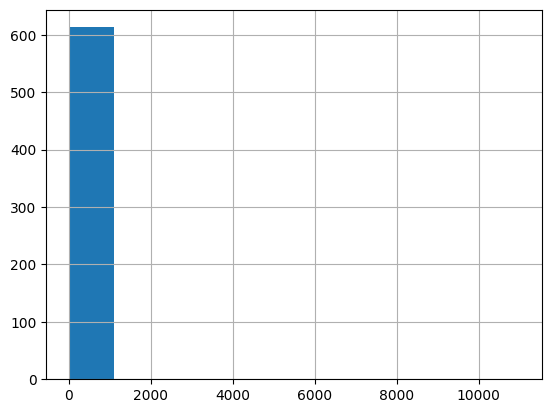

In [23]:
data['area'].hist()

In [24]:
data['area'].describe()

count      615.000000
mean       109.526423
std        490.059278
min          0.000000
25%         40.000000
50%         55.000000
75%         83.000000
max      11000.000000
Name: area, dtype: float64

In [25]:
# Lọc giá trị ngoại lai theo phương pháp IQR

Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)

IQR = Q3 - Q1
IQR

43.0

In [26]:
# xác định khoảng trên và khoảng dưới

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(lower)
print(upper)

-24.5
147.5


In [27]:
# lọc giá trị ngoại lai

data_area_outlier = data[(data['area'] < lower) | (data['area'] > upper)]
data_area_outlier

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
33,210.0,4200.0,44197,So do,dong-Nam,dong-Nam,2.0,3.0,5.0,21.001275,105.839304,trong ngo,20000.00
225,180.0,36000.0,44306,So do,dong-Nam,dong-Nam,4.0,4.0,2.0,21.012310,105.828978,trong ngo,200000.00
232,300.0,48000.0,44306,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,4.0,21.009239,105.824230,trong ngo,160000.00
351,300.0,120000.0,44323,So do,dong-Nam,dong-Nam,4.0,6.0,3.0,21.009239,105.824230,trong ngo,400000.00
374,168.0,23520.0,44323,So do,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000549,105.828985,trong ngo,140000.00
392,300.0,34300.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,3.0,21.013468,105.807427,trong ngo,114333.33
405,168.0,22500.0,44325,So do,dong-Nam,dong-Nam,1.0,5.0,1.0,21.000549,105.828985,trong ngo,133928.57
442,180.0,36500.0,44325,So do,Tay-Bac,Tay-Bac,4.0,3.0,4.0,21.016493,105.822814,trong ngo,202777.78
471,234.0,103000.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.018072,105.829949,mat pho,440170.94
477,4450.0,50000.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.018072,105.829949,mat pho,11235.96


In [ ]:
data_area_outlier.shape

(57, 13)

In [28]:
# Dữ liệu không chứa ngoại lai của cột area

data_area = data[~((data['area'] < lower) | (data['area'] > upper))]
data_area

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.00
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.21
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.35
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.46
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,76.0,30500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009533,105.820193,mat pho,401315.79
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho,269230.77
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho,291666.67
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho,551111.11


# giá/m2

In [40]:
# Lý do: vì cột area có những dòng có giá trị = 0 dẫn đến phép chia trả về infinity.
# Cần bỏ những dòng = 0 ở cột area trước khi tính giá/m2
data_2 = data_1[data_1['area'] > 0]

In [41]:
data_2['giá/m2'] = data_2['price']/data_2['area']

<ipython-input-41-22f999abf154>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['giá/m2'] = data_2['price']/data_2['area']


<Axes: >

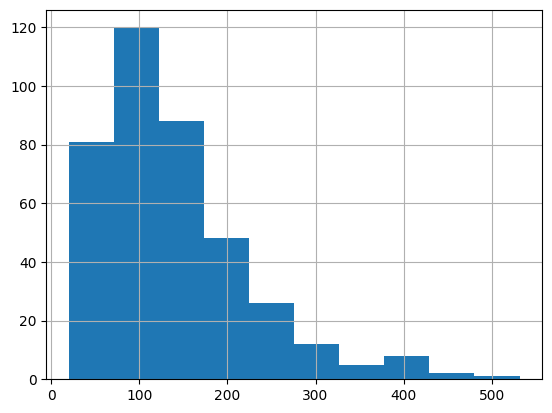

In [43]:
data_2['giá/m2'].hist()

In [ ]:
# Hình như tính toán ra số có vấn đề a cô?
# vì cột area có giá trị = 0

In [44]:
# Yêu cầu: loại bỏ dữ liệu ngoại lai của cột area, mình thấy nên tách thành 2 bảng để phân tích,
# vì trên thực tế có những ngôi nhà mặt đất có diện tích lớn như vậy (ở đây là số lượng 57 mảnh/ 671 mảnh),
# nên bỏ đi thì thì có khi lại không phù hợp với tình hình thực tế.

# ĐỒNG Ý

# Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

<Axes: >

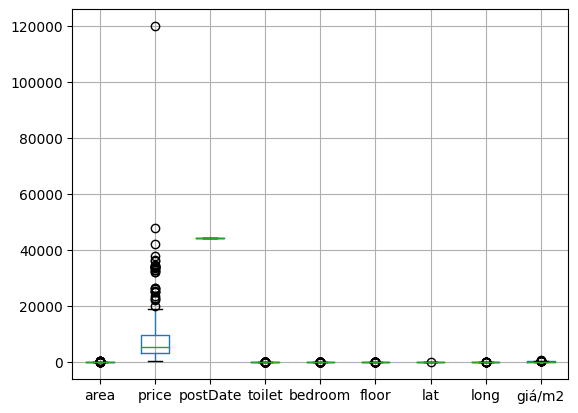

In [45]:
data_2.boxplot()

In [ ]:
# z- score scaling

In [46]:
# khai báo phương pháp
s_scaler = StandardScaler()

# áp phương pháp vào tập dữ liệu
data_s = s_scaler.fit_transform(data_2[['giá/m2']])

# đưa lại về dạng bảng

data_s = pd.DataFrame(data_s, columns=['price/m2'])
data_s

,price/m2
0,1.758475
1,-0.727536
2,0.442996
3,-0.300394
4,-0.444698
...,...
386,2.453058
387,1.514899
388,-0.360069
389,-0.400898


In [ ]:
# dữ liệu số quá lớn để tính toán fai không cô?

In [47]:
# Minmax scaling

# khai báo phương pháp
minmax_scaler = MinMaxScaler()

# áp phong pháp vão tâp dû liêu
data_m = minmax_scaler.fit_transform(data_2[['giá/m2']])

# đưa lại về dạng bảng
data_m = pd.DataFrame(data_m, columns=['price/m2'])
data_m

,price/m2
0,0.535754
1,0.104969
2,0.307803
3,0.178986
4,0.153980
...,...
386,0.656114
387,0.493547
388,0.168645
389,0.161570


In [50]:
# Robust Scaling

# khai báo phương pháp
robust_scaler = RobustScaler()

# áp phương pháp vào tập DL
data_r = robust_scaler.fit_transform(data_2[['giá/m2']])

# đưa lại về dạng bảng
data_r = pd.DataFrame(data_r, columns=['price/m2'])
data_r

,price/m2
0,1.946887
1,-0.518228
2,0.642466
3,-0.094676
4,-0.237766
...,...
386,2.635633
387,1.705359
388,-0.153849
389,-0.194335


In [ ]:
# hình như dữ liệu quá lớn nên có lỗi fai không cô?